<a href="https://colab.research.google.com/github/NonKhuna/0-100-Data-Visualization/blob/master/health-insurance-cross-sell-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from kaggle

---

นำขอมูล Health Insurance Cross Sell Prediction  จาก kaggle  เป็นการวิเคราะห์คนที่สนใจประกันรถยนต์จากคนที่มีประกันชีวิต

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [ ]:
!kaggle datasets download -d anmolkumar/health-insurance-cross-sell-prediction

In [ ]:
!unzip /content/health-insurance-cross-sell-prediction.zip

# Data analysis

---



<div class="tableWrapper"><table>
<thead>
<tr>
<th>Variable</th>
<th>Definition</th>
</tr>
</thead>
<tbody>
<tr>
<td>id</td>
<td>Unique ID for the customer</td>
</tr>
<tr>
<td>Gender</td>
<td>Gender of the customer</td>
</tr>
<tr>
<td>Age</td>
<td>Age of the customer</td>
</tr>
<tr>
<td>Driving_License</td>
<td>0 : Customer does not have DL, 1 : Customer already has DL</td>
</tr>
<tr>
<td>Region_Code</td>
<td>Unique code for the region of the customer</td>
</tr>
<tr>
<td>Previously_Insured</td>
<td>1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance</td>
</tr>
<tr>
<td>Vehicle_Age</td>
<td>Age of the Vehicle</td>
</tr>
<tr>
<td>Vehicle_Damage</td>
<td>1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.</td>
</tr>
<tr>
<td>Annual_Premium</td>
<td>The amount customer needs to pay as premium in the year</td>
</tr>
<tr>
<td>Policy<em>Sales</em>Channel</td>
<td>Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.</td>
</tr>
<tr>
<td>Vintage</td>
<td>Number of Days, Customer has been associated with the company</td>
</tr>
<tr>
<td>Response</td>
<td>1 :  Customer is interested, 0 : Customer is not interested</td>
</tr>
</tbody>
</table></div><br>


[แหล่งที่มา](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#ใช้ tranin data set ในการวิเคราะห์
df = pd.read_csv("/content/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## ข้อมูลอายุ


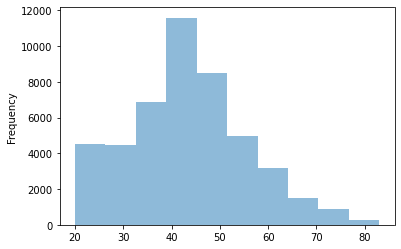

In [ ]:
df[df['Response']==1]['Age'].plot.hist(alpha=0.5) ##ผู้ใช้ที่สนใจส่วนมากเป็นคนอายุประมาณ 35-40 ปี

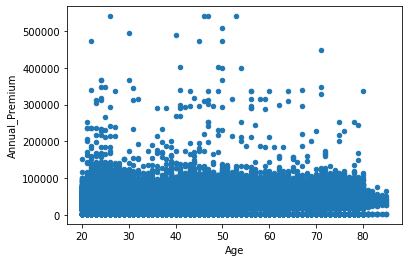

In [ ]:
age_relate_Premium = pd.DataFrame()
age_relate_Premium['Age'] = df['Age']
age_relate_Premium['Annual_Premium'] = df['Annual_Premium']
age_relate_Premium.plot.scatter(x='Age',y='Annual_Premium') #จำนวนเงินที่จ่ายทุกช่วงอายุเท่าๆกัน


### สรุป


*   ผู้ใช้ที่สนใจส่วนมากเป็นคนอายุประมาณ 35-40 ปี **(น่าสนใจ)**
*   ในแต่ละอายุจะมีคนที่จ่ายค่า Annual_Premium เท่าๆกันประมาณ น้อยกว่า 150000 และมีคนที่จ่ายเกิน 400000 ขึ้นไปเป็นบางส่วน 






## Driving_License

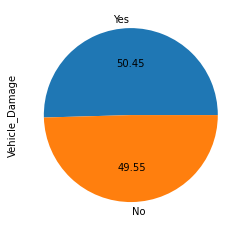

In [ ]:
#1
df[(df['Driving_License']==1)]['Vehicle_Damage'].value_counts().plot.pie(autopct='%.2f') #คนมีใบขับขี่ก็ยังมีโอกาสเกิดอุบัติเหตุเยอะถึง 50.45% ซึ้งเกินคริ่ง

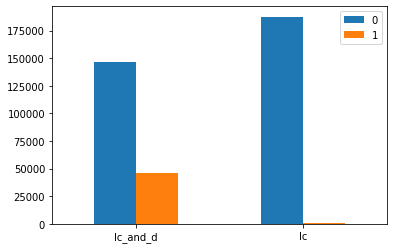

In [ ]:
#2
have_license_and_damage= df[(df['Driving_License']==1) & (df['Vehicle_Damage']=='Yes')]
have_license= df[(df['Driving_License']==1) & (df['Vehicle_Damage']=='No')]
mergDf = pd.DataFrame({"lc_and_d":have_license_and_damage['Response'].value_counts(),
                       "lc":have_license['Response'].value_counts() }, index=range(2))
mergDf.T.plot.bar(rot=0,)

### สรุป

*   คนมีใบขับขี่ ยังมีโอกาสเกิดอุบัติเหตุเยอะถึง 50.45% ซึ่งเกินคริ่ง ไทยคงไม่ต่างกัน555
*   จากกราฟ 2 จะเห็นว่าคนที่มีใบขับขี่และเคยประสบอุบัติเหตุมีความสนใจที่จะซื้อประกันระดับหนึ่ง แต่เมื่อดูอีกแท่งหนึ่งซึ่งเป็นแท่งที่มีใบขับขี่ แต่ไม่เคยประสบอุบัติเหตุเลย แทบจะไม่มีคนสนใจ (อันนี้สงสัยเฉยๆเลยลองทำดูนะครับ มันก็เมคเซ้นอยู่แล้ว)



## Region

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


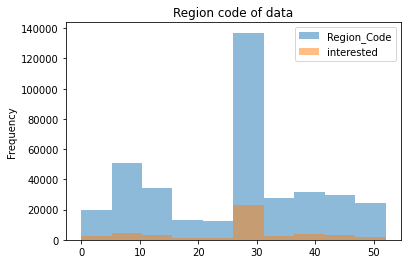

In [ ]:
region = df[['Region_Code']]
region['interested'] = df[df['Response']==1]['Region_Code']
region.plot.hist(alpha=0.5,title='Region code of data')

### สรุป

*   พื้นที่ตัวอย่างส่วยใหญ่อยู่ที่ region code 30 ซึ่งเป็นกลุ่มใหญ่
* ความสนใจของคนในพื้นที่เป็นดังกราฟ



#ไร้สาระ


##คนไม่มีใบขับขี่ มีคนสนใจทำประกันรถไหม

have : 812


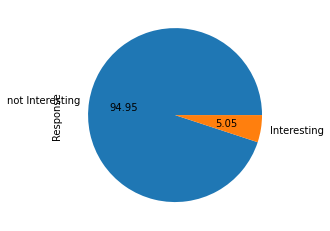

In [ ]:
no_driving_license = df[df['Driving_License']==0]
print("have :",len(no_driving_license))
no_driving_license = no_driving_license.replace(0,'not Interesting')
no_driving_license = no_driving_license.replace(1,'Interesting')
no_driving_license['Response'].value_counts().plot.pie(autopct='%.2f') #มีคนต้องการด้วย?

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
9257,9258,Female,53,0,8.0,0,1-2 Year,Yes,39478.0,25.0,234,1
20930,20931,Female,44,0,3.0,0,1-2 Year,Yes,35644.0,26.0,272,1
26167,26168,Male,63,0,28.0,0,1-2 Year,Yes,2630.0,122.0,44,1
30954,30955,Male,45,0,28.0,0,1-2 Year,Yes,51397.0,124.0,43,1
35296,35297,Female,67,0,28.0,0,1-2 Year,Yes,56891.0,26.0,42,1


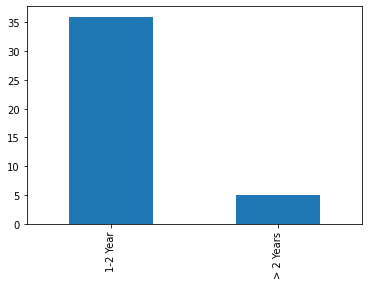

In [ ]:
#ใน 5.05 % มีอะไร ทำไมถึงสนใจ
no_driving_license = df[(df['Driving_License']==0) & (df['Response']==1)]
no_driving_license['Vehicle_Age'].value_counts().plot.bar() #น่าจะมีรถแต่ไม่มีใบขับขี่ 
no_driving_license.head()

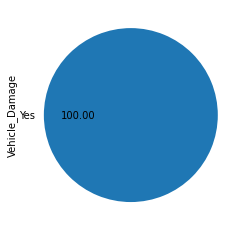

In [ ]:
no_driving_license['Vehicle_Damage'].value_counts().plot.pie(autopct='%.2f') #มีอุบัติเหตุมาก่อนถึงมาทำประกัน

### สรุป
*   มีคนที่ไม่มีใบขับขี่แต่อยากได้ประกัน
*   คนเหล่านี้มีรถซึ่งจากข้อมูลพบว่าไม่มีคนที่มีอายุรถน้อยกว่า 1 ปี อาจจะเป็นไปได้ทั้ง รถมือสอง หรือสายเก๋าที่หลบตำรวจ
*  มีอุบัติเหตุกันทุกคน..... น่าจะมาจากสาเหตุมีอุบัติเหตุ เลยทำให้สนใจประกัน

